
Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y
Data downloaded and read into a dataframe!


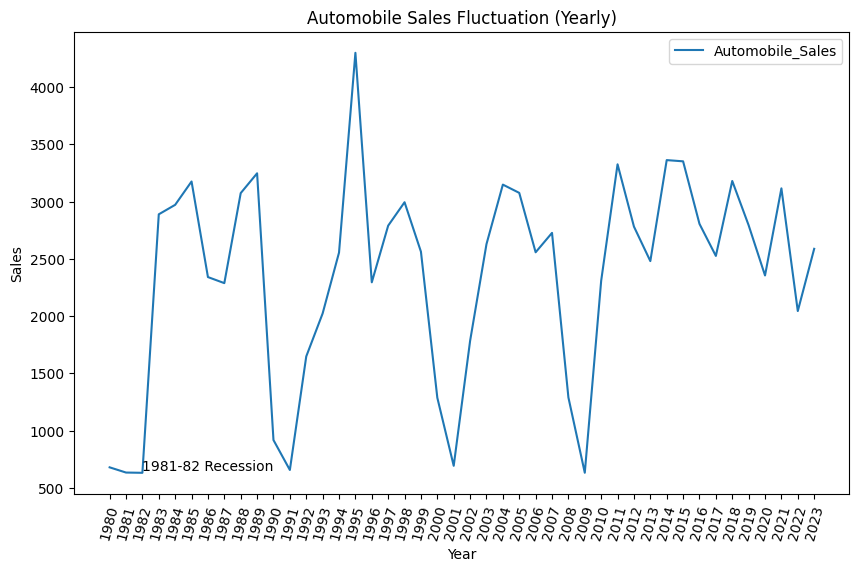

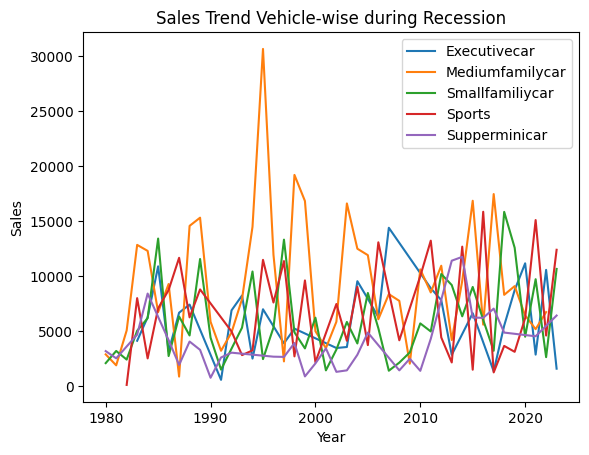

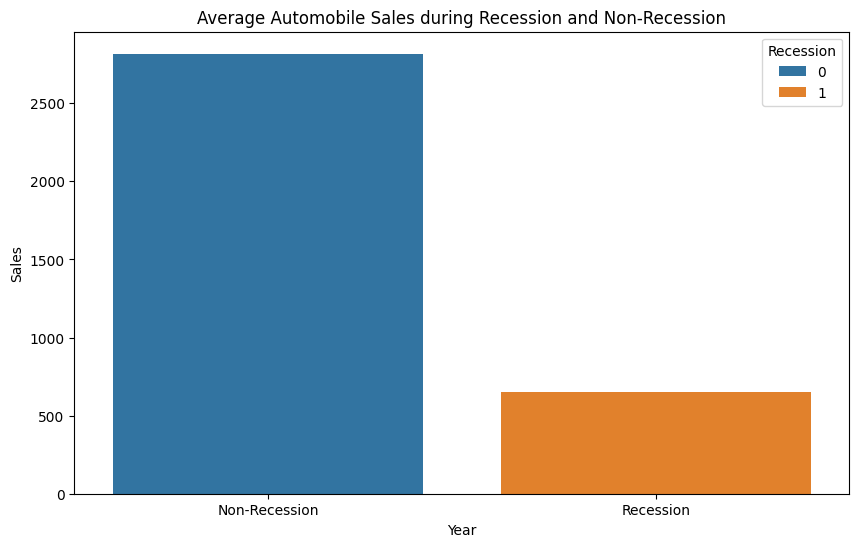

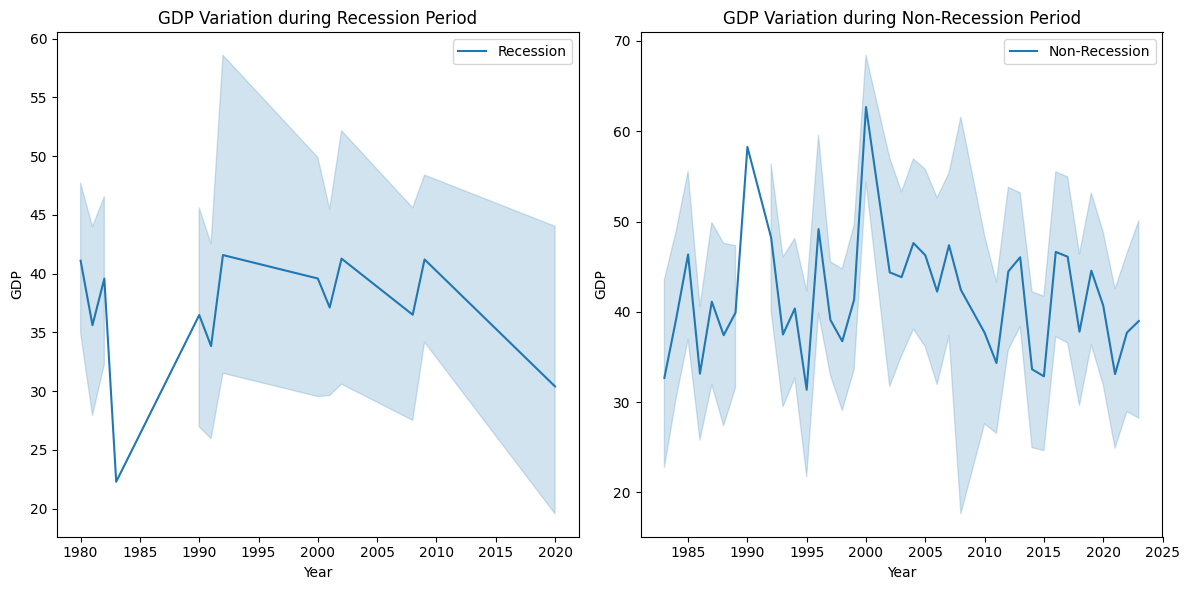

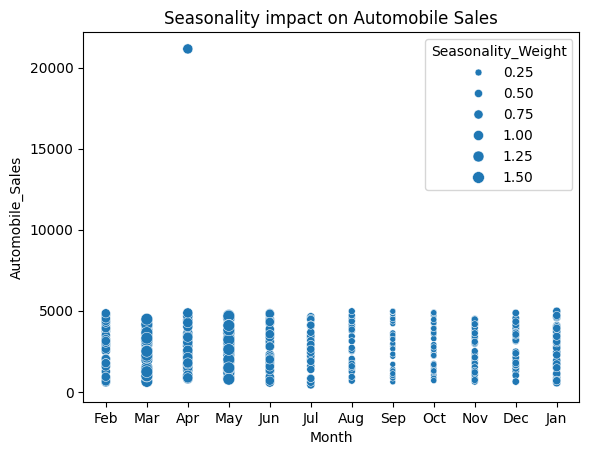

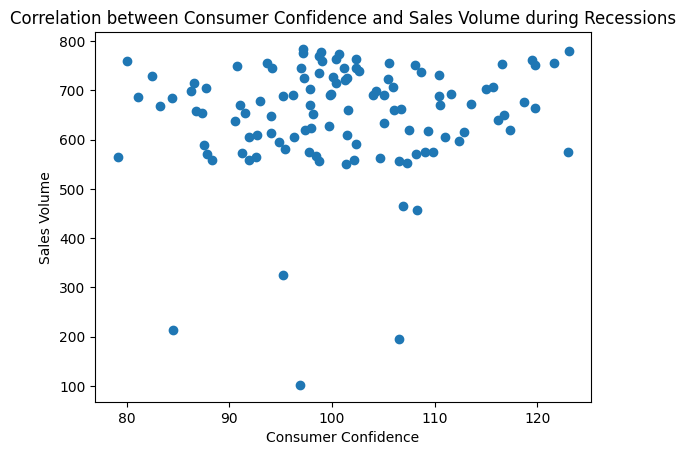

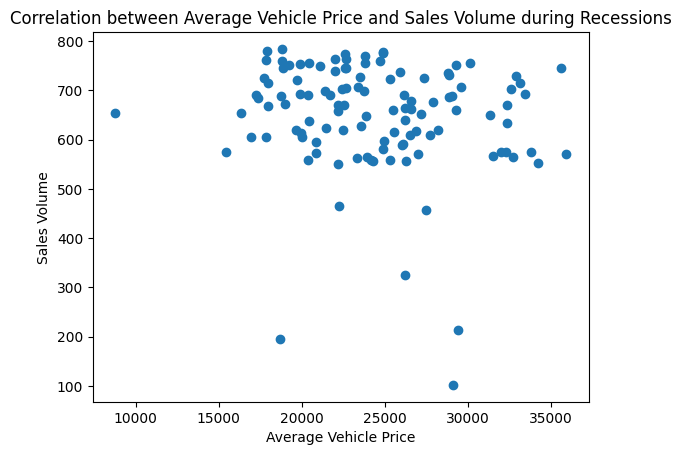

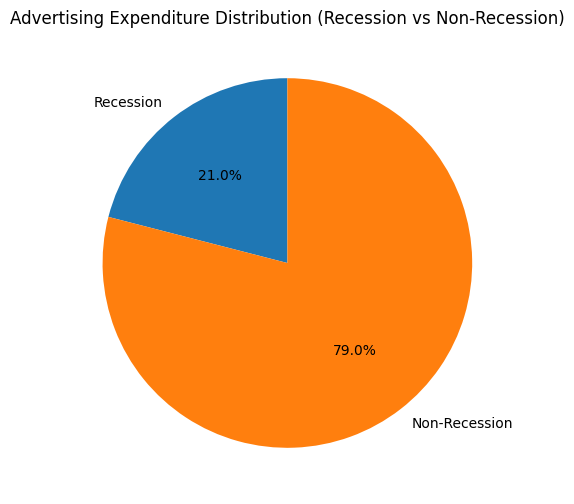

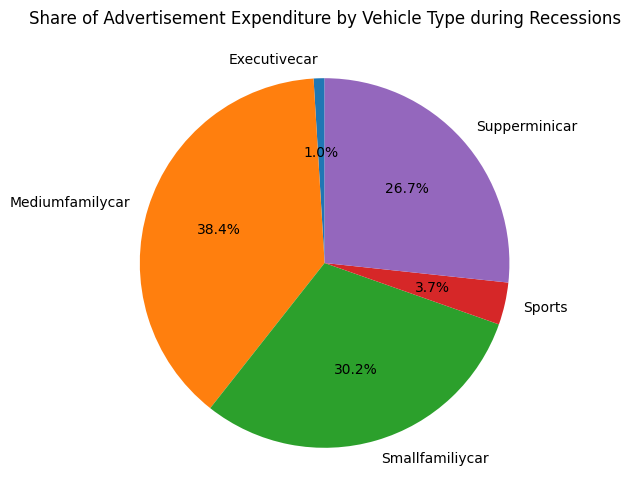

<ipython-input-8-f57cfc83ba64>:159: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='Year', y='Automobile_Sales',


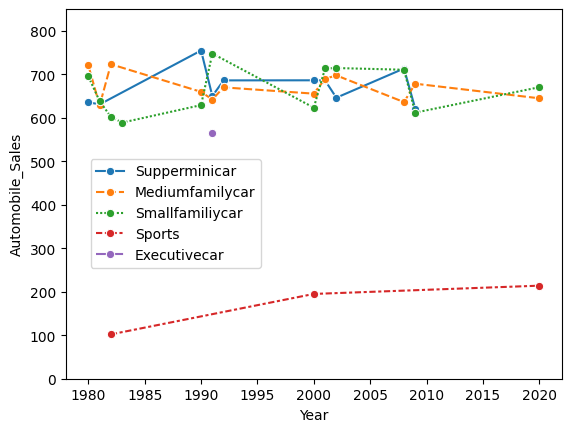

In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
%pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

%pip install seaborn
%pip install folium

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = requests.get(URL)
if resp.status_code == 200:
    # Convert response content to BytesIO object
    text = io.BytesIO(resp.content)
    df = pd.read_csv(text)

print('Data downloaded and read into a dataframe!')

df.describe()

df.columns

df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Automobile Sales Fluctuation (Yearly)')
plt.text(1982, 650, '1981-82 Recession')
plt.legend()
plt.show()

df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1 ,2 ,2 ) # add subplot 2 (1 row, 2 columns, second plot).

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)

#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Sales Volume')
plt.title('Correlation between Consumer Confidence and Sales Volume during Recessions')
plt.show()

#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume')
plt.title('Correlation between Average Vehicle Price and Sales Volume during Recessions')
plt.show()

# Filter the data
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure Distribution (Recession vs Non-Recession)')

plt.show()

# Filter the data
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Advertisement Expenditure by Vehicle Type during Recessions')

plt.show()

df_rec = df[df['Recession'] == 1]
sns.lineplot(data=df_rec, x='Year', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0, 850)
plt.legend(loc=(0.05, 0.3))

In [17]:
!pip install dash

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
app.title = "Automobile Statistics Dashboard"

# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# List of years
year_list = [str(i) for i in range(1980, 2024, 1)]

# Create the layout of the app
app.layout = html.Div([
    html.H1("Automobile Statistics Dashboard"),
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='select-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder='Select Statistics'
        ),
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value=year_list[-1],  # Default to the latest year
            placeholder='Select Year'
        )
    ]),
    html.Div(id='output-container', className='output-container', style={'margin-top': '20px'})
])

# Creating Callbacks
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='select-statistics', component_property='value'),
     Input(component_id='select-year', component_property='value')]
)
def update_output_container(selected_statistics, input_year):
    ctx = dash.callback_context
    if not ctx.triggered:
        return None
    trigger_id = ctx.triggered[0]["prop_id"].split(".")[0]

    if trigger_id == 'select-statistics' and selected_statistics == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]

        # Plot 1: Automobile sales fluctuate over Recession Period (year wise)
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(figure=px.line(yearly_rec, x='Year', y='Automobile_Sales',
                                            title="Average Automobile Sales fluctuation over Recession Period"))

        # Plot 2: Calculate the average number of vehicles sold by vehicle type
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales',
                                           title="Average Number of Vehicles Sold by Vehicle Type in Recession Period"))

        # Combine the charts into a single container
        return [html.Div(className='chart-item', children=[html.Div(children=R_chart1),
                                                           html.Div(children=R_chart2)])]

    elif trigger_id == 'select-statistics' and selected_statistics == 'Yearly Statistics' and input_year:
        yearly_data = data[data['Year'] == int(input_year)]

        # Plot 1: Yearly Automobile sales using line chart for the whole period
        yearly_sales = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yearly_sales, x='Year', y='Automobile_Sales',
                                            title="Yearly Automobile Sales"))

        # Plot 2: Total Monthly Automobile sales using line chart
        monthly_sales = data.groupby(['Year', 'Month'])['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(monthly_sales, x='Month', y='Automobile_Sales',
                                            title="Total Monthly Automobile Sales"))

        # Plot 3: Average Vehicles Sold by Vehicle Type in the selected year
        avg_vehicles_sold = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(figure=px.bar(avg_vehicles_sold, x='Vehicle_Type', y='Automobile_Sales',
                                           title="Average Vehicles Sold by Vehicle Type in {}".format(input_year)))

        # Plot 4: Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertisement_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data, values='Advertisement_Expenditure', names='Vehicle_Type',
                                           title="Total Advertisement Expenditure for each Vehicle Type in {}".format(input_year)))

        # Combine the charts into a single container
        return [html.Div(className='chart-item', children=[html.Div(children=Y_chart1),
                                                           html.Div(children=Y_chart2),
                                                           html.Div(children=Y_chart3),
                                                           html.Div(children=Y_chart4)])]
    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>